In [1]:
import pandas as pd
import altair as alt
# Save a vega-lite spec and a PNG blob for each plot in the notebook
#alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('data_server')

In [2]:
def getSpotifyData():
    data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')
    data = data.dropna()
    data = data.drop(['track_id', 'track_album_id', 'playlist_id'], axis=1)
    data.columns = ["Name", "Artist", "Popularity", "Album Name", "Album Release Date", "Playlist Name", 
                "Playlist Genre", "Playlist Subgenre", "Danceability", 
               "Energy", "Key", "Loudness", "Mode", "Speechiness", 
               "Acousticness", "Instrumentalness", "Liveness", "Valence", 
              "Tempo", "Duration"]
    data['Playlist Genre'] = data['Playlist Genre'].str.title()
    data['Playlist Subgenre'] = data['Playlist Subgenre'].str.title()
    mode = {1 : 'Major', 0:'Minor'}
    key = {0 : 'C', 1:'C#', 2: 'D', 3:'D#', 4: 'E', 5:'F', 6: 'F#', 7:'G', 
           8: 'G#', 9:'A', 10: 'B♭', 11:'B'}
    data.replace({"Mode":mode}, inplace = True)
    data.replace({"Key":key}, inplace = True)
    return data

In [3]:
data=getSpotifyData()

In [4]:
data.head()

,Name,Artist,Popularity,Album Name,Album Release Date,Playlist Name,Playlist Genre,Playlist Subgenre,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,Pop,Dance Pop,0.748,0.916,F#,-2.634,Major,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,Memories - Dillon Francis Remix,Maroon 5,67,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,Pop,Dance Pop,0.726,0.815,B,-4.969,Major,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,All the Time - Don Diablo Remix,Zara Larsson,70,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,Pop,Dance Pop,0.675,0.931,C#,-3.432,Minor,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,Call You Mine - The Remixes,2019-07-19,Pop Remix,Pop,Dance Pop,0.718,0.930,G,-3.778,Major,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,Pop,Dance Pop,0.650,0.833,C#,-4.672,Major,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


# Top 10 songs by Popularity 
## Mayukha Bheemavarapu

In [5]:
data_subset=data.iloc[: , :3]
data_subset=data_subset.groupby(['Name']).mean()
data_subset = data_subset. reset_index()

In [6]:
top10=data_subset.nlargest(10,'Popularity')

In [7]:
chart = alt.Chart(data_subset).mark_bar().encode(
    alt.X('mean(Popularity)'),
    alt.Y('Name',sort='-x')
)


In [8]:
chart = alt.Chart(top10).mark_bar().encode(
    alt.X('mean(Popularity)'),
    alt.Y('Name',sort='-x')
)
chart

alt.Chart(...)

# Trend over years for each genre

## Xin Tian

In [9]:
chart = alt.Chart(data).mark_line().encode(
    alt.X('year(Album Release Date)'),
    alt.Y('mean(Popularity)',sort='-x'),
    color=alt.Color('Playlist Genre')
).properties(

    width=800,
    height=450

)
chart

alt.Chart(...)

# Count of songs over years
## Sarah Hall

In [11]:
chart = alt.Chart(data).mark_line().encode(
    alt.X('year(Album Release Date)'),
    alt.Y('count(Name)',sort='-x'),
    color=alt.Color('Playlist Genre')
).properties(

    width=800,
    height=450

)
chart

alt.Chart(...)

# pie chart for each genre (by sub genre)
## Neethu G

In [13]:
#(to do)

In [35]:
data_filtered2 = data_filtered[["Energy", "Valence","Danceability","Acousticness"]]


<AxesSubplot:>

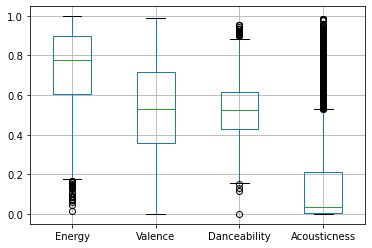

In [37]:
data_filtered2.boxplot()

<AxesSubplot:>

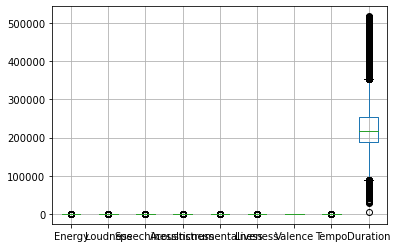

In [33]:
data_subset.boxplot()

In [51]:
chart = alt.Chart(data).mark_circle().encode(
    alt.X('Playlist Genre'),
    alt.Y('count(Name)',scale=alt.Scale(domain=(3500, 6500))),
    color=alt.Color('Playlist Genre'),
    size=alt.Size('Playlist Genre')).properties(width=700,
        height=450

)
chart

alt.Chart(...)